In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt as pw

In [2]:
data = pd.read_excel("data.xlsx", sheet_name="0-sitting",
                     header=0, usecols="B:F")
data = data[0]
data = (data - min(data)) / (max(data) - min(data))
ecg = data.T.values.tolist()

D:\Scoop\apps\anaconda3\current\lib\site-packages\pandas\io\excel\_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


In [6]:
coeffs_l2 = pw.swt(ecg, wavelet="haar", level=2, start_level=0, axis=-1)
coeffs_l4 = pw.swt(ecg, wavelet="haar", level=4, start_level=0, axis=-1)
d2 = coeffs_l2[1][1]
d4 = coeffs_l4[1][1]

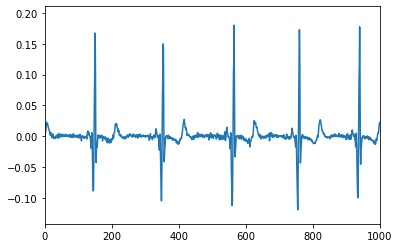

In [7]:
plt.xlim(0, 1000)
plt.plot(d2)

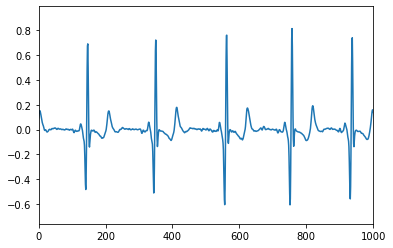

In [8]:
plt.xlim(0, 1000)
plt.plot(d4)

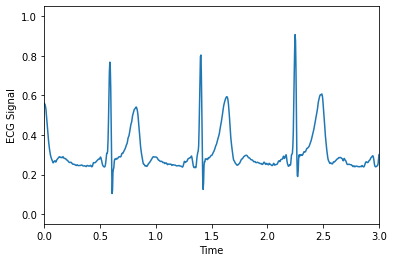

In [3]:
import wavelet_filter as filter
from ecg_gudb_database import GUDb
sample_rate = GUDb.fs
t = np.arange(len(ecg)) / float(sample_rate)
filtered = filter.wavelet_filtering(data[0])
plt.xlabel('Time')
plt.ylabel('ECG Signal')
plt.xlim(0, 3)
plt.plot(t, filtered)

In [4]:
filtered

array([0.56015196, 0.55784149, 0.55301876, ..., 0.35923758, 0.36991733,
       0.37876844])

In [7]:
ecg

array([0.56031406, 0.55745896, 0.55389008, ..., 0.35831549, 0.36830835,
       0.38187009])

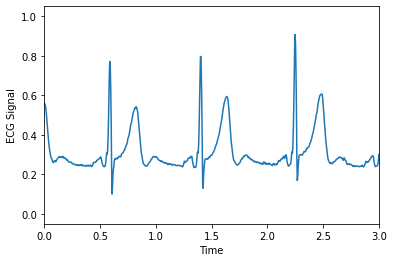

In [6]:
plt.xlabel('Time')
plt.ylabel('ECG Signal')
ecg = np.array(ecg)
t = np.arange(len(ecg)) / float(250)
ecg = (ecg - min(ecg)) / (max(ecg) - min(ecg))
plt.xlim(0, 3)
plt.plot(t, ecg)


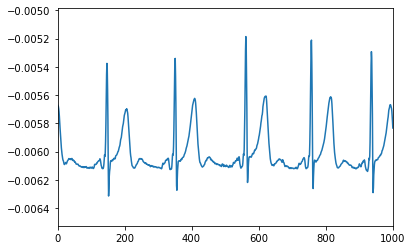

In [103]:
coeffcs = pw.wavedec(ecg, 'db6', level=3)
y = pw.waverec(coeffcs, 'db6')
plt.xlim(0, 1000)
plt.plot(y)

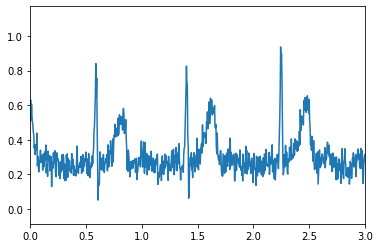

In [3]:
data += np.random.normal(0, 0.05, (data.shape))
t = np.arange(len(data)) / float(250)
plt.xlim(0, 3)
plt.plot(t, data)


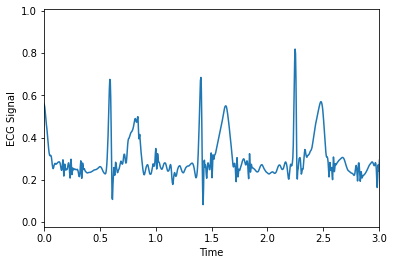

In [4]:
import wavelet_filter as filter
from ecg_gudb_database import GUDb
sample_rate = GUDb.fs
filtered = filter.wavelet_filtering(data)
plt.xlabel('Time')
plt.ylabel('ECG Signal')
plt.xlim(0, 3)
plt.plot(t, filtered)

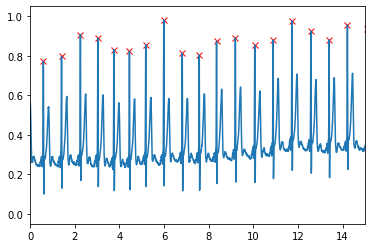

In [23]:
from qrs_detect_demo import QRS_detection as detect
spot = detect(ecg, 250, 160)
spot_t = []
spot_r = []
for i in spot:
    spot_t.append(t[i])
for i in spot:
    spot_r.append(ecg[i])
plt.xlim(0, 15)
plt.plot(spot_t, spot_r, 'x', color='r')
plt.plot(t, ecg)